In [93]:
import numpy as np 
import pandas as pd

In [94]:
df = pd.read_csv("sales_data_sample.csv",encoding='latin-1')

In [95]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [96]:
df.shape

(2823, 25)

In [97]:
df.size

70575

In [98]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [100]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [101]:
df.drop(columns=['ORDERNUMBER','ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
                  'TERRITORY', 'CONTACTLASTNAME','STATUS','PHONE','CONTACTFIRSTNAME','CUSTOMERNAME'],inplace = True)

In [102]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [103]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [104]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [105]:
productline = pd.get_dummies(df['PRODUCTLINE'])
dealsize = pd.get_dummies(df['DEALSIZE'])

In [106]:
df = pd.concat([df,productline,dealsize],axis = 1)

In [107]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0


In [108]:
df.drop(columns=['COUNTRY','PRODUCTLINE','DEALSIZE'],inplace = True)

In [109]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [110]:
df.drop(['ORDERDATE'],axis = 1,inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   QTR_ID            2823 non-null   int64  
 5   MONTH_ID          2823 non-null   int64  
 6   YEAR_ID           2823 non-null   int64  
 7   MSRP              2823 non-null   int64  
 8   PRODUCTCODE       2823 non-null   int8   
 9   Classic Cars      2823 non-null   uint8  
 10  Motorcycles       2823 non-null   uint8  
 11  Planes            2823 non-null   uint8  
 12  Ships             2823 non-null   uint8  
 13  Trains            2823 non-null   uint8  
 14  Trucks and Buses  2823 non-null   uint8  
 15  Vintage Cars      2823 non-null   uint8  
 16  Large             2823 non-null   uint8  


In [112]:
from sklearn.cluster import KMeans

In [113]:
distortions = []
k = range(2,12)

In [114]:
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(df)
    distortions.append(model.inertia_)

In [115]:
import matplotlib.pyplot as plt

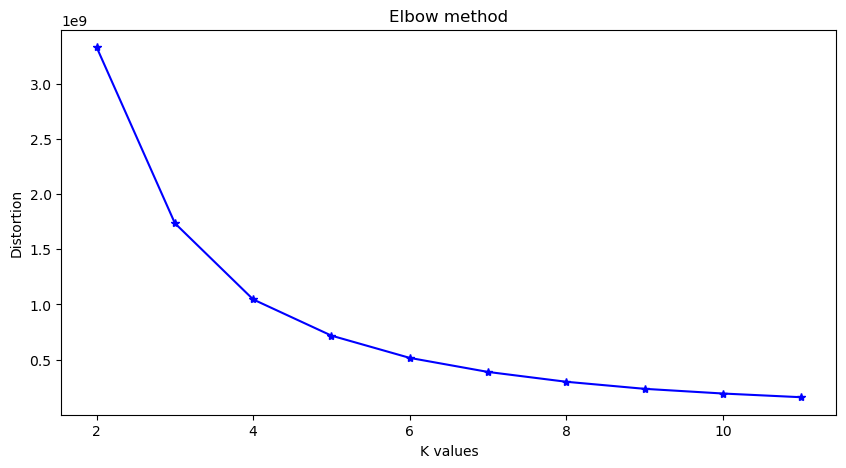

In [116]:
plt.figure(figsize=(10,5))
plt.plot(k,distortions,'b*-')
plt.xlabel("K values")
plt.ylabel("Distortion")
plt.title("Elbow method")
plt.show()